In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from dateutil.parser import parse #https://stackoverflow.com/questions/40121822/extracting-year-from-string-in-python
pd.set_option("display.max_rows", 999) # To control the number of rows to be display while working with the dataframe

data_list = []
with open('../LA_LC_data-csv.csv', 'r', encoding="ISO-8859-1") as f: #An error raises if this encoding is not specify
    for line in f.readlines():
        # print(line)
        new_line = line.replace(',,,,,,,,,,,,', '') #To better display the output... not needed in the end, should be dropped
        # print(new_line)
        if new_line.startswith('DATOS DIARIOS'): #grepping this line in order to extract the year
            # print(new_line)
            yy = parse(new_line, fuzzy=True).year
            # print(yy)
        elif new_line[0].isdigit():
            data_line = new_line.split(',')
#             # print(data_line)
#             # data_line.pop(0)
            data_line[-1] = data_line[-1].replace('\n', '')
            # print(data_line)
            DAY, ENE, FEB, MAR, ABR, MAY, JUN, JUL, AGO, SEP, OCT, NOV, DIC = data_line #Unpacking the list into its corresponding fields
            data_list.append([yy, DAY, ENE, FEB, MAR, ABR, MAY, JUN, JUL, AGO, SEP, OCT, NOV, DIC])
            
df = pd.DataFrame(data_list, columns = [
                                   'YEAR', 'DAY', 'ENE', 'FEB', 'MAR', 'ABR', 
                                   'MAY', 'JUN',  'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'
                                       ] )
df.head()         

,YEAR,DAY,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,1960,1,30.6,27.8,30.2,30.4,-,28.6,31.6,32.5,32.4,32,30.2,28.8
1,1960,2,32,30.5,32,30.2,30.2,31.5,31.5,29.2,31.4,32.6,30,27.5
2,1960,3,30,30.5,29.5,30.5,31,30.6,32,31.8,32.6,32.5,30.2,26
3,1960,4,31,31.3,30,30.9,31.5,31,31.8,31,33,31.6,30.4,26.6
4,1960,5,30.2,31.4,29.5,29.4,30.8,31.5,31,31.3,34.2,31.2,30.5,27


In [2]:
df2 = pd.DataFrame(columns=['YEAR', 'MONTH', 'DAY', 'TMAX'])
data = []
months = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN',  'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']
grp_df = df.groupby(['YEAR'])
for year in range(1960, 2022, 1):
    # print(year)
    yr = grp_df.get_group(year) #yr is a dataframe containing the data for a single year like in the original file
    # print(yr)
    for month in months:
        # print(yr[month])
        for t, d in zip(yr[month], yr['DAY']):
            data.append([year, month, d, t])
df2 = pd.DataFrame(data, columns = [
                                   'YEAR', 'MONTH', 'DAY', 'TMAX'
                                 ] )

# df2.head()
df2['MONTH_NUM'] = df2['MONTH']
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('ENE', '1')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('FEB', '2')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('MAR', '3')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('ABR', '4')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('MAY', '5')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('JUN', '6')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('JUL', '7')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('AGO', '8')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('SEP', '9')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('OCT', '10')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('NOV', '11')
df2['MONTH_NUM'] = df2['MONTH_NUM'].replace('DIC', '12')

df2.reset_index()
df2.head()

,YEAR,MONTH,DAY,TMAX,MONTH_NUM
0,1960,ENE,1,30.6,1
1,1960,ENE,2,32,1
2,1960,ENE,3,30,1
3,1960,ENE,4,31,1
4,1960,ENE,5,30.2,1


In [3]:
# df2['YEAR'] = df2['YEAR'].map(str)
# df2['DAY']  = df2['DAY'].map(str)
# df2['MONTH'] = df2['MONTH_NUM']
# pd.to_datetime(df2[["YEAR", "MONTH", "DAY"]], errors="coerce").head(200)

In [4]:
df2['YEAR'] = df2['YEAR'].map(str)
df2['DAY']  = df2['DAY'].map(str)
dt_list = []
for year, month, day in zip(df2["YEAR"], df2["MONTH_NUM"], df2["DAY"]):
        try:
            pd.to_datetime(year + "/" + month + "/" + day)
        except:
            df2 = df2.drop(df2[(df2['YEAR'] == year) & (df2['MONTH_NUM'] == month) & (df2['DAY'] == day)].index)
df2["DATE"] = pd.to_datetime(df2["YEAR"] + "/" + df2["MONTH_NUM"] + "/" + df2["DAY"])
df2 = df2[["DATE", "YEAR", "MONTH", "MONTH_NUM", "DAY", "TMAX"]]
df2 = df2.replace('-', np.nan)
df2.head()

,DATE,YEAR,MONTH,MONTH_NUM,DAY,TMAX
0,1960-01-01,1960,ENE,1,1,30.6
1,1960-01-02,1960,ENE,1,2,32
2,1960-01-03,1960,ENE,1,3,30
3,1960-01-04,1960,ENE,1,4,31
4,1960-01-05,1960,ENE,1,5,30.2


In [5]:
# writer = pd.ExcelWriter('../time_series-other.xlsx')
# df2.to_excel(writer)
# writer.save()

<AxesSubplot:xlabel='DATE'>

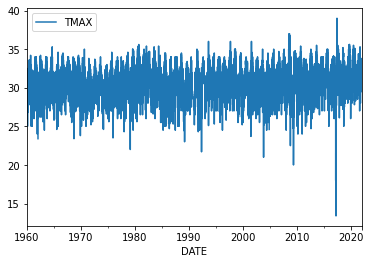

In [6]:
df2['TMAX']      = pd.to_numeric(df2['TMAX'])
df2 = df2[["DATE", "TMAX"]]
df2.set_index('DATE', inplace=True)
df2.plot()

In [7]:
print(df2.max())
df2[['TMAX']].idxmax()

TMAX    39.0
dtype: float64


TMAX   2017-05-31
dtype: datetime64[ns]

In [8]:
print(df2.min())
df2[['TMAX']].idxmin()

TMAX    13.4
dtype: float64


TMAX   2017-03-26
dtype: datetime64[ns]

In [9]:
df2.describe()


,TMAX
count,21996.000000
mean,30.943758
std,1.629129
min,13.400000
25%,30.000000
50%,31.000000
75%,32.000000
max,39.000000


In [10]:
df2.isnull().sum()

TMAX    650
dtype: int64

In [11]:
df2.shape

(22646, 1)

In [12]:
df2.dtypes

TMAX    float64
dtype: object

In [13]:
df2 = df2.dropna(axis=0, how='all')

In [14]:
# import statsmodels.api as sm

# ds = sm.tsa.seasonal_decompose(df2, model='additive', period='D')
# ds.plot()

In [15]:
df2.isnull().sum()

TMAX    0
dtype: int64